The first few code snippets here show my learning process in creating the final code for the first part of the first question.

I have organized the final solution to the Sub Task 1 in the "Final Circuit" section of this notebook, and it follows the solution for the secont part of the first question in section "Final Circuit Sub Task 2"

Note: I have reused the gate matrices multiple times, but I have declared it only in the first cell, and the final circuit cell of the first sub part. So, if you want to run this notebook, run all from the begining.

In [20]:
import numpy as np

# initializing the qubits and gates

#|0>
ket0 = np.array([[1],[0]])

# |1>
ket1 = np.array([[0],[1]])

# <0|
bra0 = np.array([[1,0]])

# <1|
bra1 = np.array([[0,1]])

X = np.array([[0,1],
              [1,0]])
H = 1/np.sqrt(2) * np.array([[1,1],
                            [1,-1]])
I = np.array([[1,0],
              [0,1]])

# making the CNOT gate as:
# CNOT = |0><0| ⊗ I + |1><1| ⊗ X
cnot = np.kron(np.matmul(ket0,bra0), I) + np.kron(np.matmul(ket1,bra1), X)

# Single Qubit Circuit

In [21]:
# single qubit circuit:

# applying X gate, then H gate on ket0
new_state = np.matmul(X, ket0)
new_state = np.matmul(H, new_state)

print(new_state)

[[ 0.70710678]
 [-0.70710678]]


# Two Qubit Circuit

In [22]:
# 2 qubit circuit:

# initializing all qubits to 0
initial_state = ket0

n_qubits = 2

# creating the 2^n vector to represent 2 qubits through kronecker product
for _ in range(n_qubits-1):   # taking n-1 because I have already assigned initial_state to be ket0
  initial_state = np.kron(ket0, initial_state)

print("Initial State: ")
print(initial_state)

X_onFirst = np.kron(X, I) # created 2 qubit X gate to act on first qubit
H_onSecond = np.kron(I, H) # created 2 qubit H gate to act on second qubit

# applying X gate on first qubit, H gate on second qubit, then CNOT gate
new_state = np.matmul(X_onFirst, initial_state)
new_state = np.matmul(H_onSecond, new_state)
new_state = np.matmul(cnot, new_state)

print("Final State: ")
print(new_state)

Initial State: 
[[1]
 [0]
 [0]
 [0]]
Final State: 
[[0.        ]
 [0.        ]
 [0.70710678]
 [0.70710678]]


# Multi Qubit Circuit

In [23]:
# multi (>2) qubit circuit:

n_qubits = 4

initial_state = ket0

# here, I have initialized the n-qubit gates by assigning them the values of single quibt gate
# I have used them in the loop below, performing kronecker product with themselves to create n-qubit gate.
X_for_n = X
H_for_n = H

for _ in range(n_qubits-1):
  initial_state = np.kron(ket0, initial_state)
  X_for_n = np.kron(X_for_n, X)
  H_for_n = np.kron(H_for_n, H)

new_state = np.matmul(X_for_n, initial_state)
new_state = np.matmul(H_for_n, initial_state)

# here, I have applied the X gate and H gate on each of the qubit.
# On each qubit, I first applied X gate, then H gate.

print("Final State: ")
print(new_state)

[[0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]]


In [24]:
# Here, I am trying to learn to use CNOT gate through matrix multiplication in cases when we have more than 2 qubits.

# |0110>
initial_state = np.kron(ket0, np.kron(ket1, np.kron(ket1, ket0)))

print("Initial State: ")
print(initial_state)

# creating CNOT gtae such that it would act in this way: CNOT(q0, q1) and CNOT(q2, q3)
CNOT_gate = np.kron(cnot, cnot)

new_state = np.matmul(CNOT_gate, initial_state)
# expected answer: |0111>

print("Final State: ")
print(new_state)

"""
and I got that answer.
So, from this I learned that doing kronecker product with itself, I can create
CNOT gate that I can apply in the circuit to work on subsequent pairs of qubits,
making the first qubit control qubit and the later qubit target qubit.
So, I got |0111> in this code
"""

Initial State: 
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
Final State: 
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


'\nand I got that answer.\nSo, from this I learned that doing kronecker product with itself, I can create\nCNOT gate that I can apply in the circuit to work on subsequent pairs of qubits,\nmaking the first qubit control qubit and the later qubit target qubit.\nSo, I got |0111> in this code\n'

I wanted to apply the CNOT gate to every other pair in my quantum circiuit.
For example, for:
> q0q1q2q3q4 \\

I wanted to apply the gates this way: \\

> CNOT(q0, q1) and CNOT(q2,q3) \\

So, in this code snippet, I learned a way to do it through matrix multiplication. Turns out, we can simply take the kronecker product of two CNOT gates, and adjust them according to the number of qubits.
In this following cell, I tried to apply CNOT gate when we have odd number of qubits. In this case, there will be one qubit which will stay unaffected of the gate operation.

---







In [25]:
n_qubits = 3

# making |110> as initial state
initial_state = np.kron(ket1, np.kron(ket1, ket0))

print("Initial State: ")
print(initial_state)

def CNOT_gate_creator(n):
  CNOT_gate = cnot  # initializing to be the 2-qubit gate
  for _ in range(n-1):
    CNOT_gate = np.kron(CNOT_gate, cnot)

  return(CNOT_gate)

# applying this condition because CNOT gate needs atleast 2 qubits.
if n_qubits >= 2:
  if n_qubits % 2 == 0:
    n = int(n_qubits / 2)                # this because CNOT gate acts on a control qubit and target qubit, so, we need to perform the kronecker product half times.
    CNOT_gate = CNOT_gate_creator(n)     # calls the function above that creates the desired CNOT gate.
  else:
    n_qubits -= 1
    n = int(n_qubits / 2)
    CNOT_gate = CNOT_gate_creator(n)
    CNOT_gate = np.kron(CNOT_gate, I)   # so that if there is one qubit left without a pair, we don't do anything to it while applying CNOT gate on other pairs

  new_state = np.matmul(CNOT_gate, initial_state)
else:
  new_state = initial_state               # this because the CNOT gate needs atleast two qubits (a control and a target) to act on

print("Final State: ")
print(new_state)

Initial State: 
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
Final State: 
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


# Final Circuit

Collecting everything:

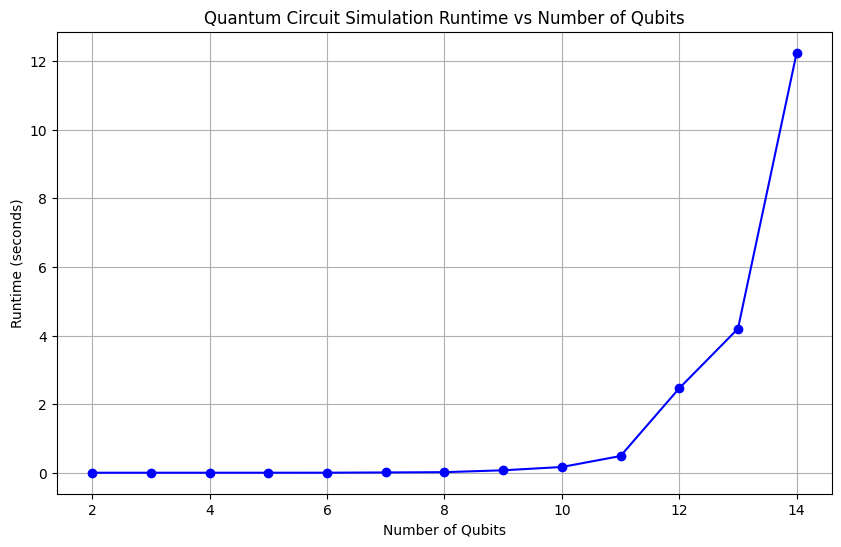

Maximum number of qubits simulated: 14


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])
bra0 = np.array([[1,0]])
bra1 = np.array([[0,1]])

X = np.array([[0,1],[1,0]])
H = 1/np.sqrt(2) * np.array([[1,1],[1,-1]])
I = np.array([[1,0],[0,1]])
cnot = np.kron(np.matmul(ket0,bra0), I) + np.kron(np.matmul(ket1,bra1), X)

def simulate_circuit(n_qubits):

    initial_state = ket0
    X_gate = X
    H_gate = H

    for _ in range(n_qubits - 1):
      initial_state = np.kron(ket0, initial_state)
      X_gate = np.kron(X_gate, X)
      H_gate = np.kron(H_gate, H)

    # applying X gate on each qubit
    new_state = np.matmul(X_gate, initial_state)

    # applying H gate on each qubit
    new_state = np.matmul(H_gate, new_state)

    # creating the appropriate CNOT gate to act on every other pair of the qubits
    def CNOT_gate_creator(n):
      CNOT_gate = cnot
      for _ in range(n-1):
        CNOT_gate = np.kron(CNOT_gate, cnot)

      return(CNOT_gate)

    if n_qubits >= 2:
      if n_qubits % 2 == 0:
        n = int(n_qubits / 2)
        CNOT_gate = CNOT_gate_creator(n)
      else:
        n_qubits -= 1
        n = int(n_qubits / 2)
        CNOT_gate = CNOT_gate_creator(n)
        CNOT_gate = np.kron(CNOT_gate, I)

      new_state = np.matmul(CNOT_gate, new_state)

    return new_state

def measure_runtime(n_qubits):
    start_time = time.time()      # time recording started
    simulate_circuit(n_qubits)    # running the code to simulate the circuit
    end_time = time.time()        # time recording ended
    return end_time - start_time



"""
I ran this code to find out the maximum number of qubits that this code could simulate, and found it to be 14.

# starting with 2 qubits
n_qubits = 2
while True:
  runtime = measure_runtime(n_qubits)

  print(n_qubits)
  n_qubits += 1
"""



# plotting the graph of number of quibts vs runtime

n_qubits_range = range(2, 15)  # because my system could simulate only 14 qubits
runtimes = [measure_runtime(n) for n in n_qubits_range]
plt.figure(figsize=(10, 6))
plt.plot(n_qubits_range, runtimes, 'bo-')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Quantum Circuit Simulation Runtime vs Number of Qubits')
plt.grid(True)
plt.show()


print(f"Maximum number of qubits simulated: {max(n_qubits_range)}")

I used while loop to let the code keep simulating the increasing number of qubits till my laptop could hande. After simulating 14 qubits, I got this error message:

> "Your session crashed after using all available RAM."

I observed that the session crashed while the multi qubit gates were being formed in the loop. So, I guess, if there is a better way to create those gates, we could be able to simulate more qubits.

# Sub Task 2

I think I learned a lot in this part.
Here, first I had to learn what it means by tensor, n-dimensional tensor, and what it meant by a tensor of shape (2,2,2,....2), tensor multiplication, and tensor contraction. Then I went into transforming my previous state vector into the n-dimensional tensor.

In [2]:
# number of qubits to simulate
n = 5

# initializing the state to be zero
state = ket0
for _ in range(n-1):
  state = np.kron(state, ket0)

# reshaping the 2^n vector into an n-dimensional tensor of shape (2, 2, 2...2) for n qubits
state = state.reshape((2,) * n)

print(state)

# gives the number of qubits in case we only have the state vector
print("Number of qubits simulated: ", len(state.shape))

[[[[[1 0]
    [0 0]]

   [[0 0]
    [0 0]]]


  [[[0 0]
    [0 0]]

   [[0 0]
    [0 0]]]]



 [[[[0 0]
    [0 0]]

   [[0 0]
    [0 0]]]


  [[[0 0]
    [0 0]]

   [[0 0]
    [0 0]]]]]
Number of qubits simulated:  5


Here, I tried different ways and finally learned to simulate 3 qubits

In [3]:
# number of qubits to simulate
n_qubits = 3

# initializing the states to be all zero
state = ket0
for _ in range(n_qubits - 1):
  state = np.kron(state, ket0)

state = state.reshape((2,) * n_qubits)

print("Initial State: ", state.flatten())

def gates_with_tensordot(state):

  # I want to apply X gate on each qubit at even index, and H gate on each qubit at odd index
  for i in range(n_qubits):

    state = np.tensordot(X, state, axes=([1], [i]))   # applying the X gate
    # rearranging the axes to maintain the original order of the qubits
    axes = list(range(1, i + 1)) + [0] + list(range(i + 1, n_qubits))
    state = np.transpose(state, axes)

    state = np.tensordot(H, state, axes=([1], [i]))   # applying the H gate
    axes = list(range(1, i + 1)) + [0] + list(range(i + 1, n_qubits))
    state = np.transpose(state, axes)

  return state

# applying X and H gates
new_state = gates_with_tensordot(state)

print(new_state.flatten())

Initial State:  [1 0 0 0 0 0 0 0]
[ 0.35355339 -0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339
  0.35355339 -0.35355339]


In this part, I learned a way to apply CNOT gate on this n-dimensional tensor. 
Instead of applying it like the one in previous circuit, I have applied here differently.
Like for a qubit

> q0q1q2q3q4, 

I applied CNOT gate as:
CNOT(q0, q1), CNOT(q1, q2), CNOT(q2, q3), CNOT(q3, q4)

In [4]:
# number of qubits to simulate
n_qubits = 2

cnot = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

# initializing the states to be all zero
state = ket0
for _ in range(n_qubits - 1):
  state = np.kron(state, ket0)

state = state.reshape((2,) * n_qubits)


def HX_gates(state):

  # I want to apply X gate on each qubit at even index, and H gate on each qubit at odd index
  for i in range(n_qubits):

    state = np.tensordot(X, state, axes=([1], [i]))   # applying the X gate
    # rearranging the axes to maintain the original order of the qubits
    axes = list(range(1, i + 1)) + [0] + list(range(i + 1, n_qubits))
    state = np.transpose(state, axes)

    state = np.tensordot(H, state, axes=([1], [i]))   # applying the H gate
    axes = list(range(1, i + 1)) + [0] + list(range(i + 1, n_qubits))
    state = np.transpose(state, axes)

  return state


def cnot_gate(state):
    for i in range(n_qubits - 1):
        # I reshaped the state to apply the CNOT gate to qubits i and i+1
        shape_before = state.shape
        state = np.moveaxis(state, [i, i+1], [-2, -1])
        state = state.reshape((-1, 4))
        state = np.dot(state, cnot.T)
        state = state.reshape(shape_before)
        state = np.moveaxis(state, [-2, -1], [i, i+1])

    return state



# applying X and H gates
new_state = HX_gates(state)
new_state = cnot_gate(new_state)

print(new_state)

print(new_state.flatten())

[[ 0.5 -0.5]
 [ 0.5 -0.5]]
[ 0.5 -0.5  0.5 -0.5]


To check if my preious code gave right answer, I used the idea of simulating the circuit of 3 qubits using 2^n vector representation and the matrix product for X and H gates.

In [5]:
X_gate = X
H_gate = H

n_qubits = 2
initial_state = ket0

for _ in range(n_qubits - 1):
    initial_state = np.kron(ket0, initial_state)
    X_gate = np.kron(X_gate, X)
    H_gate = np.kron(H_gate, H)


new_state = np.matmul(X_gate, initial_state)
new_state = np.matmul(H_gate, new_state)
new_state = np.matmul(cnot, new_state)

print(new_state)

[[ 0.5]
 [-0.5]
 [ 0.5]
 [-0.5]]


and, I got exactly the same answer!

So, now I went on to finally implement the circuit.

# Final Circuit Sub Task 2

Number of qubits Simulated: 
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


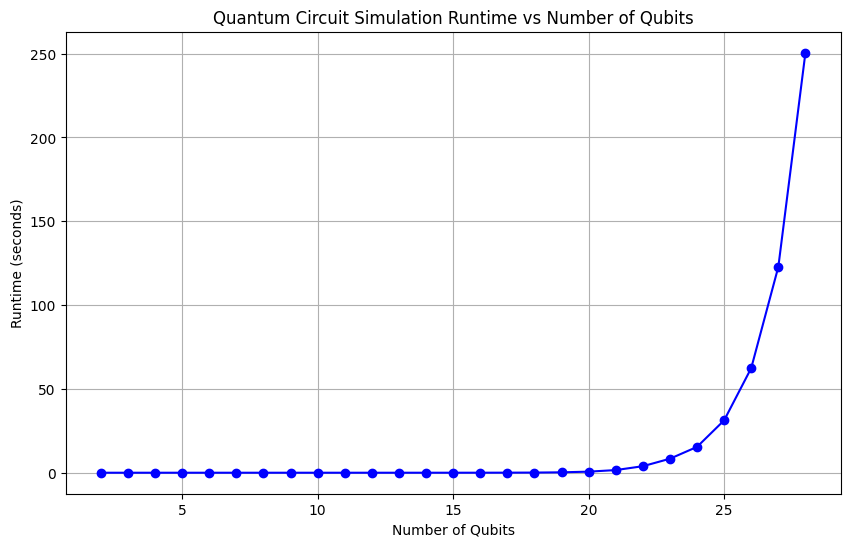

Maximum number of qubits simulated: 28


In [6]:
def HX_gates(state):

  # I want to apply X gate on each qubit at even index, and H gate on each qubit at odd index
  for i in range(n_qubits):

    state = np.tensordot(X, state, axes=([1], [i]))   # applying the X gate
    # rearranging the axes to maintain the original order of the qubits
    axes = list(range(1, i + 1)) + [0] + list(range(i + 1, n_qubits))
    state = np.transpose(state, axes)

    state = np.tensordot(H, state, axes=([1], [i]))   # applying the H gate
    axes = list(range(1, i + 1)) + [0] + list(range(i + 1, n_qubits))
    state = np.transpose(state, axes)

  return state


def cnot_gate(state):
    for i in range(n_qubits - 1):   # n-1 to make sure that there will always be i+1 to make it a target qubit at the end
        # I reshaped the state to apply the CNOT gate to qubits i and i+1
        shape_before = state.shape
        state = np.moveaxis(state, [i, i+1], [-2, -1])
        state = state.reshape((-1, 4))
        state = np.dot(state, cnot.T)
        state = state.reshape(shape_before)
        state = np.moveaxis(state, [-2, -1], [i, i+1])

    """
    This part looks too complicated, and I went through a long process of trial
    and error to find out a way to impliment the CNOT gate on subsequent qubits
    """

    return state


def measure_runtime(n_qubits, state):
    start_time = time.time()      # time recording started

    new_state = HX_gates(state)
    new_state = cnot_gate(new_state)

    end_time = time.time()        # time recording ended
    return end_time - start_time



"""

I used this while loop to simulate the quantum circuit with increasing number of qubits till the session crashed after using all RAM.
And, found the max qubits to be 28.

n_qubits = 2

while True:
  state = ket0
  for _ in range(n_qubits - 1):
    state = np.kron(state, ket0)

  state = state.reshape((2,) * n_qubits)

  runtime = measure_runtime(n_qubits)

  print(n_qubits)
  n_qubits += 1

"""


runtimes = []

# starting with 2 qubits
n_qubits = 2

print("Number of qubits Simulated: ")

while n_qubits <= 28:
  state = ket0
  for _ in range(n_qubits - 1):
    state = np.kron(state, ket0)

  state = state.reshape((2,) * n_qubits)

  runtime = measure_runtime(n_qubits, state)
  runtimes.append(runtime)

  print(n_qubits)
  n_qubits += 1

n_qubits_range = range(2, 29)

# plotting the graph of number of quibts vs runtime
plt.figure(figsize=(10, 6))
plt.plot(n_qubits_range, runtimes, 'bo-')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Quantum Circuit Simulation Runtime vs Number of Qubits')
plt.grid(True)
plt.show()

print(f"Maximum number of qubits simulated: {max(n_qubits_range)}")

Hence, I was able to simulate 28 qubits through this method.
I think, defining the states and gates through this method was the major factor that brought this change. Still, I saw my code was mostly stuck while performing the CNOT gate operation. If there is a way to implement that part more properly, we could be able to simulate more qubits.

Bonus Question

# Sampling

Since we are applying H gate and then CNOT gate, our final state is in superposition. So, from my understanding, the question has asked me to perform measurement on the final quantum state and find out the possible states. So, first I have taken an initial state of |000>, applied X gate on each of the qubits, and then H gate on each of them, and then applied CNOT gate keeping the first qubit as control and the second qubit as target, and did nothing to the third qubit in this operation.

I have used the final state generated from this operation in sampling.

In [7]:
ket000 = np.kron(ket0, np.kron(ket0, ket0))

X_gate = np.kron(X, np.kron(X, X))
H_gate = np.kron(X, np.kron(H, H))
CNOT = np.kron(cnot, I)

new_state = np.matmul(X_gate, ket000)
new_state = np.matmul(H_gate, new_state)
new_state = np.matmul(CNOT, new_state)

print("Initial State:")
print(ket000)

print("Final State:")
print(new_state)

Initial State:
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
Final State:
[[ 0.5]
 [-0.5]
 [-0.5]
 [ 0.5]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]]


In [8]:
# using the final state generated in the previous cell,

final_state = np.array([0.5, -0.5, -0.5, 0.5, 0, 0, 0, 0])

# because the probability of obtaining the state is square of its amplitude
probabilities = np.abs(final_state)**2

def sample(probabilities, num_samples):
    return np.random.choice(len(probabilities), size=num_samples, p=probabilities)

"""
in the above function, the parameters I am passing are:
probabilities: this is the array of the probability of obtaining each state
num_samples: number of samples I want to take

- len(probability) gives the
"""

# Generate 1000 samples
samples = sample(probabilities, 1000)

# Count occurrences
unique, counts = np.unique(samples, return_counts=True)
for state, count in zip(unique, counts):
    print(f"State |{state:03b}>: {count} occurrences")

State |000>: 241 occurrences
State |001>: 246 occurrences
State |010>: 258 occurrences
State |011>: 255 occurrences


# Calculating the Expectation value:

< si | Op | si >

In [9]:
ket000 = np.kron(ket0, np.kron(ket0, ket0))
bra000 = np.kron(bra0, np.kron(bra0, bra0))

# we are applying X, H and CNOT gate sequentially, so, the matrix should be CHX
X_gate = np.kron(X, np.kron(X, X))
H_gate = np.kron(X, np.kron(H, H))
CNOT = np.kron(cnot, I)

operator = np.matmul(CNOT, np.matmul(H_gate, X_gate))

expectation_value = np.matmul(bra000, np.matmul(operator, ket000))

print("Expectation Value: ")
print(expectation_value)

Expectation Value: 
[[0.5]]
